## Problem Definition
The task is to forecast the total number of yellow taxi request at a certain time.
## Data Source 
The data is collected from https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page.
It consist of 19 features:

1) VendorID A code indicating the TPEP provider that provided the record.

2) tpep_pickup_datetime The date and time when the meter was engaged.

3) tpep_dropoff_datetime The date and time when the meter was disengaged.

4) Passenger_count The number of passengers in the vehicle.

5) Trip_distance The elapsed trip distance in miles reported by the taximeter.

6) PULocationID TLC Taxi Zone in which the taximeter was engaged

7) DOLocationID TLC Taxi Zone in which the taximeter was disengaged

8) RateCodeID The final rate code in effect at the end of the trip.

9) Store_and_fwd_flag This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,”

10) Payment_type A numeric code signifying how the passenger paid for the trip.

11) Fare_amount The time-and-distance fare calculated by the meter.

12) Extra Miscellaneous extras and surcharges. 

13) MTA_tax $0.50 MTA tax that is automatically triggered based on the metered rate in use.

14) Improvement_surcharge $0.30 improvement surcharge assessed trips at the flag drop.

15) Tip_amount Tip amount – This field is automatically populated for credit card tips.

16) Tolls_amount Total amount of all tolls paid in trip.

17) Total_amount The total amount charged to passengers. Does not include cash tips.

18) Congestion_Surcharge Total amount collected in trip for NYS congestion surcharge.

19) Airport_fee $1.25 for pick up only at LaGuardia and John F. Kennedy Airports

In [7]:
import pandas as pd
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt

In [8]:
df = pd.read_parquet('yellow_tripdata_2022-11.parquet')

In [9]:
df.shape

(3252717, 19)

In [10]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-11-01 00:51:22,2022-11-01 00:56:24,1.0,0.6,1.0,N,151,151,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,0.0,0.0
1,1,2022-11-01 00:39:43,2022-11-01 00:48:44,0.0,1.8,1.0,N,90,79,1,8.5,3.0,0.5,3.05,0.0,0.3,15.35,2.5,0.0
2,1,2022-11-01 00:55:01,2022-11-01 01:01:35,0.0,2.0,1.0,N,137,141,1,8.0,3.0,0.5,2.36,0.0,0.3,14.16,2.5,0.0
3,1,2022-11-01 00:24:49,2022-11-01 00:31:04,2.0,1.0,1.0,N,158,113,1,6.0,3.0,0.5,0.00,0.0,0.3,9.80,2.5,0.0
4,1,2022-11-01 00:37:32,2022-11-01 00:42:23,2.0,0.8,1.0,N,249,158,2,5.5,3.0,0.5,0.00,0.0,0.3,9.30,2.5,0.0


## Considering only pickup time and location id

In [11]:
data=df[['tpep_pickup_datetime','PULocationID']]
data.head()

,tpep_pickup_datetime,PULocationID
0,2022-11-01 00:51:22,151
1,2022-11-01 00:39:43,90
2,2022-11-01 00:55:01,137
3,2022-11-01 00:24:49,158
4,2022-11-01 00:37:32,249


In [14]:
print("Number of unique location: "+str(len(data.PULocationID.unique())))


Number of unique location: 260


In [15]:
data['total_request']=1
data.set_index('tpep_pickup_datetime',inplace=True)


C:\Users\deepa\AppData\Local\Temp\ipykernel_6264\2396716073.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_request']=1


In [16]:
data=data.loc['2022-11-01':'2022-11-30']


In [17]:
data.sort_values('tpep_pickup_datetime')

,PULocationID,total_request
tpep_pickup_datetime,,
2022-11-01 00:00:00,132,1
2022-11-01 00:00:03,107,1
2022-11-01 00:00:06,138,1
2022-11-01 00:00:06,100,1
2022-11-01 00:00:06,170,1
...,...,...
2022-11-30 23:59:52,138,1
2022-11-30 23:59:55,79,1
2022-11-30 23:59:55,162,1


In [20]:
agg_data=data.groupby(['PULocationID'])

In [21]:
import seaborn as sns

In [22]:
agg_data.count()

,total_request
PULocationID,
1,879
2,2
3,49
4,3713
5,43
...,...
261,15966
262,43966
263,68654


[Text(0.5, 1.0, 'Top 5 location with maximum request')]

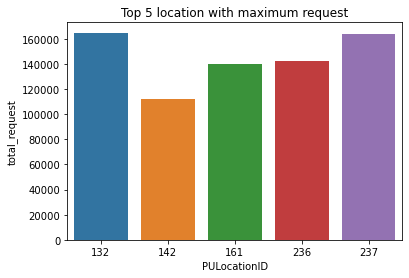

In [24]:
sns.barplot(data=agg_data.count().reset_index().sort_values(by="total_request").tail(),x="PULocationID",y="total_request").set(title="Top 5 location with maximum request")

In [25]:
agg_data.count().sort_values(by="total_request").reset_index().tail()

,PULocationID,total_request
255,142,112136
256,161,140024
257,236,142769
258,237,163881
259,132,164950


## Resampling data in hourly interval by Location ID

In [26]:
final=data.groupby('PULocationID').resample('1H')[['total_request']].sum()

In [27]:
final.reset_index(inplace=True)

In [35]:
#creating dataframe with 1 month date with hourly interval
missing_value= pd.DataFrame(
        {'tpep_pickup_datetime': pd.date_range('2022-11-01', '2022-12-01', freq='1H', closed='left')}
     )

C:\Users\deepa\AppData\Local\Temp\ipykernel_6264\2540028487.py:3: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  {'tpep_pickup_datetime': pd.date_range('2022-11-01', '2022-12-01', freq='1H', closed='left')}


In [30]:
# creating dataframe using unique location id
category=pd.DataFrame(data.PULocationID.unique(),columns=['PULocationID'])
category.head()


,PULocationID
0,151
1,90
2,137
3,158
4,249


# # Creating cleaned final data

In [37]:
# cross product of time and location to create all values for each unique location idea and time stamp
# 260*30*24 = 187200
all_values=missing_value.merge(category,how="cross")

In [38]:
all_values

,tpep_pickup_datetime,PULocationID
0,2022-11-01 00:00:00,151
1,2022-11-01 00:00:00,90
2,2022-11-01 00:00:00,137
3,2022-11-01 00:00:00,158
4,2022-11-01 00:00:00,249
...,...,...
187195,2022-11-30 23:00:00,187
187196,2022-11-30 23:00:00,59
187197,2022-11-30 23:00:00,204
187198,2022-11-30 23:00:00,115


In [33]:
# merging the all values with the data we have and filling nan by 0
final_data=pd.merge(final,all_values,on=['PULocationID','tpep_pickup_datetime'],how='outer')
final_data['total_request']=final_data['total_request'].fillna('0.0')


In [34]:
final_data.to_csv('clean_data.csv',index=False )